# Step 1 | Data info


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from Material import *
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

### Step 1.1 | Load data


In [2]:
df = pd.read_excel("stock_data_4000_observations.xlsx") 

----------------

### Step 1.2 | data info 


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               4000 non-null   datetime64[ns]
 1   Close_Price        4000 non-null   float64       
 2   Volume             4000 non-null   float64       
 3   ASE_General_Index  4000 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 125.1 KB


------------------------------------------

### Step 1.3 | print frist 5 rows data


In [4]:
df.head()

,Date,Close_Price,Volume,ASE_General_Index
0,2010-01-04,6.568178,2.682581e+06,2024.701038
1,2010-01-05,6.553316,8.843136e+05,1945.005971
2,2010-01-06,6.642079,4.876076e+06,1993.908972
3,2010-01-07,6.850938,2.831047e+06,1990.964407
4,2010-01-08,6.822340,3.263838e+06,2009.654354


### Step 1.4 | describe data


In [5]:
df.describe()

,Date,Close_Price,Volume,ASE_General_Index
count,4000,4000.000000,4.000000e+03,4000.000000
mean,2017-09-02 12:00:00,102.940853,2.703374e+06,11838.013371
min,2010-01-04 00:00:00,5.226612,5.010845e+05,1807.339749
25%,2013-11-03 06:00:00,17.604536,1.595574e+06,4229.418689
50%,2017-09-02 12:00:00,90.680820,2.676414e+06,13732.809618
75%,2021-07-02 18:00:00,172.131988,3.795492e+06,17849.314199
max,2025-05-02 00:00:00,389.163865,4.997573e+06,23494.258235
std,NaN,85.997381,1.290293e+06,6824.969334


### ASE Stock Data - Exploratory Data Analysis (EDA) Report

In [6]:
from ydata_profiling import ProfileReport 
profile = ProfileReport(
    df,
    title="ASE Stock Data - EDA Report",
    explorative=True,
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True}
    }
)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 250.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Step 2 | Preprocessing

### Step 2.1 | Handle Missing Values


Check missing values :)

In [29]:
df.isnull().sum()

Date                 0
Close_Price          0
Volume               0
ASE_General_Index    0
dtype: int64

----------------------------------

 Drop missing rows

In [10]:
df.dropna(inplace=True)

### Step 2.2 | Handle duplicated rows

Check duplicated rows

In [11]:
df.duplicated().sum()

0

drop duplicated rows

In [12]:
df = df.drop_duplicates()

### Step 2.3 | Sort by Date

In [13]:
df = df.sort_values('Date')
df.reset_index(drop=True, inplace=True) 

 ### Step 2.4 | Feature Engineering

In [8]:
# Daily Return of Close Price
df['Daily_Return'] = df['Close_Price'].pct_change() 

# Moving averages (10-day and 5-day)
features = ["Close_Price","Volume","ASE_General_Index"]
df["MA_5"] = df["Close_Price"].rolling(5).mean()
df["MA_10"] = df["Close_Price"].rolling(10).mean()


In [9]:
df['Price_Change'] = df['Close_Price'].diff()
df['Price_Change_Pct'] = df['Close_Price'].pct_change() * 100

# Step 3 | Visualization

### Close Price Over Time


This line chart shows the stock's closing price over the observed period. 
It provides a clear view of the overall trend, highlighting upward or downward movements, 
as well as periods of stability or volatility.

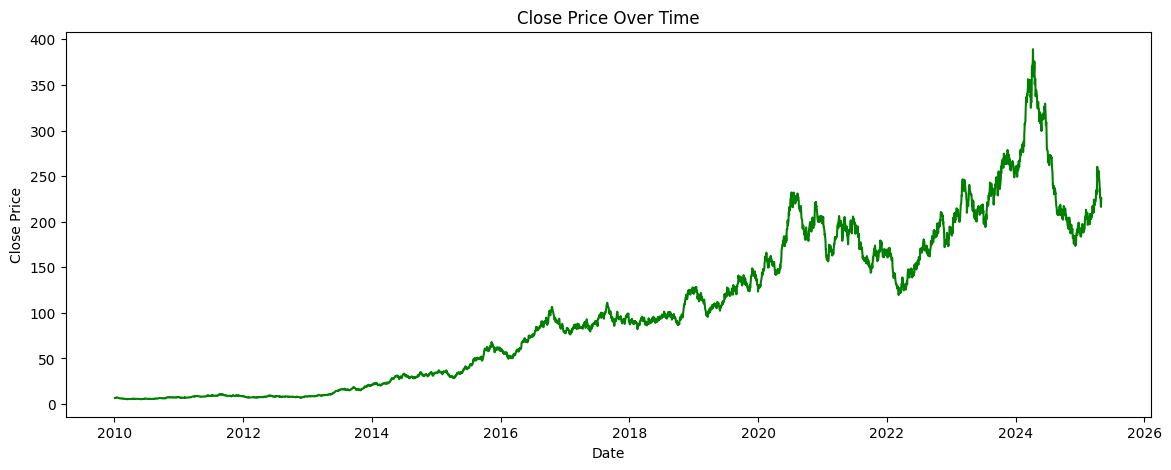

In [133]:
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Close_Price'], color='green')  
plt.title("Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

### ASE General Index Over Time

This line chart illustrates the ASE General Index over the observed period. 
It provides a clear view of the overall market trend, showing periods of growth, 
decline, and stability.

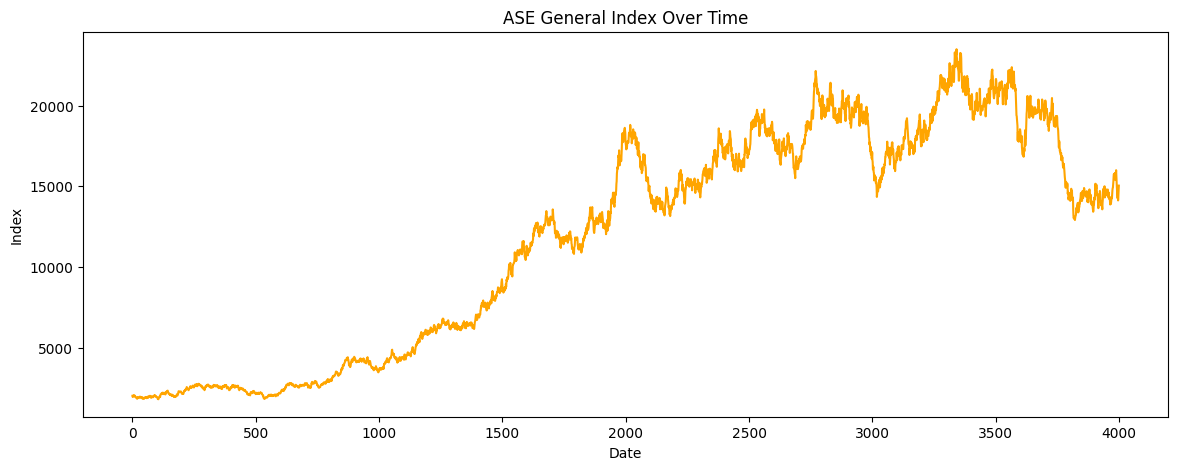

In [144]:
plt.figure(figsize=(14,5))
plt.plot(df.index, df['ASE_General_Index'],color='orange')
plt.title("ASE General Index Over Time")
plt.xlabel("Date")
plt.ylabel("Index")
plt.show()

### Close Price with Moving Averages

This figure displays the stock closing price over time along with short-term 
and medium-term moving averages. Moving averages help smooth price fluctuations 
and highlight underlying trends by reducing short-term noise.


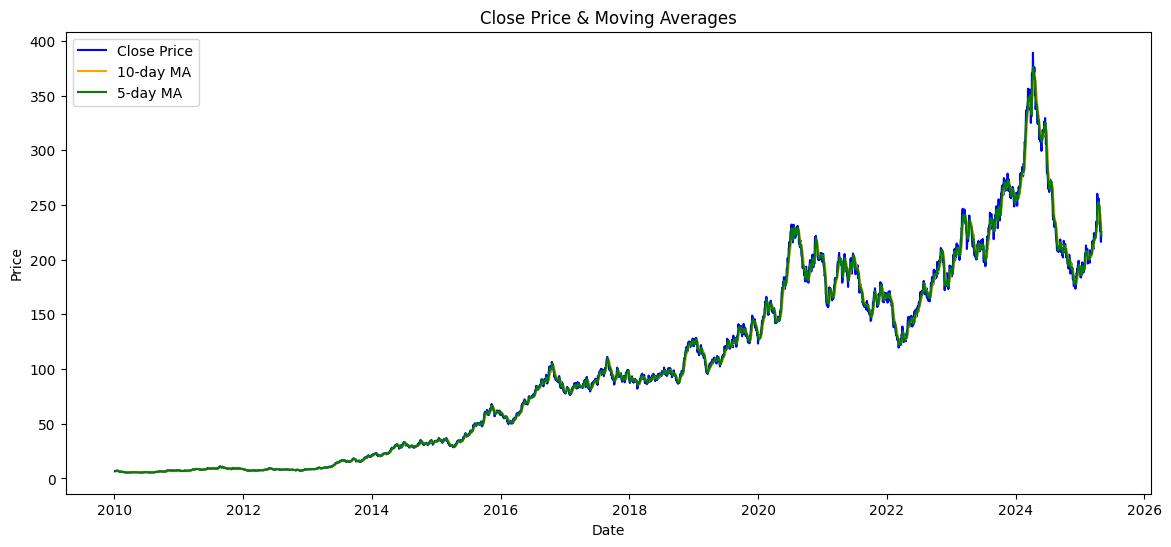

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close_Price'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA_10'], label='10-day MA', color='orange')
plt.plot(df['Date'], df['MA_5'], label='5-day MA', color='green')
plt.title("Close Price & Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


### Close Price vs ASE General Index

This plot compares the stock's closing price with the ASE General Index over time. 
It helps visualize how the stock moves relative to the overall market, highlighting 
correlations, trends, and potential periods of divergence or convergence.

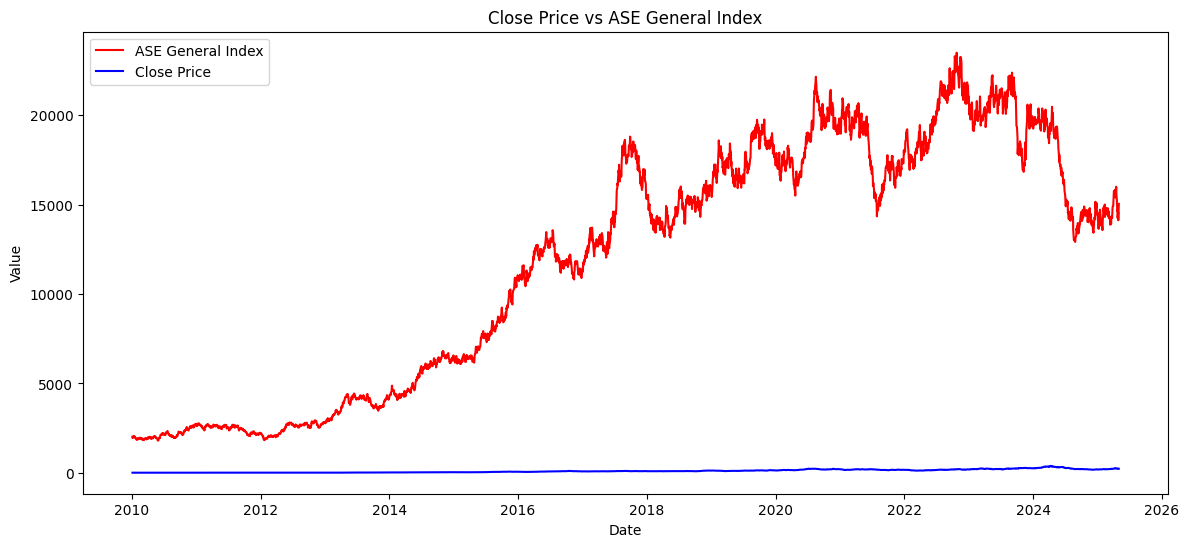

In [151]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['ASE_General_Index'], label='ASE General Index', color='red')
plt.plot(df['Date'], df['Close_Price'], label='Close Price', color='blue')
plt.title("Close Price vs ASE General Index")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

### Trading Volume Over Time

This bar chart displays the daily trading volume of the stock. It highlights periods 
of high and low market activity, allowing visualization of liquidity and investor 
interest over time.

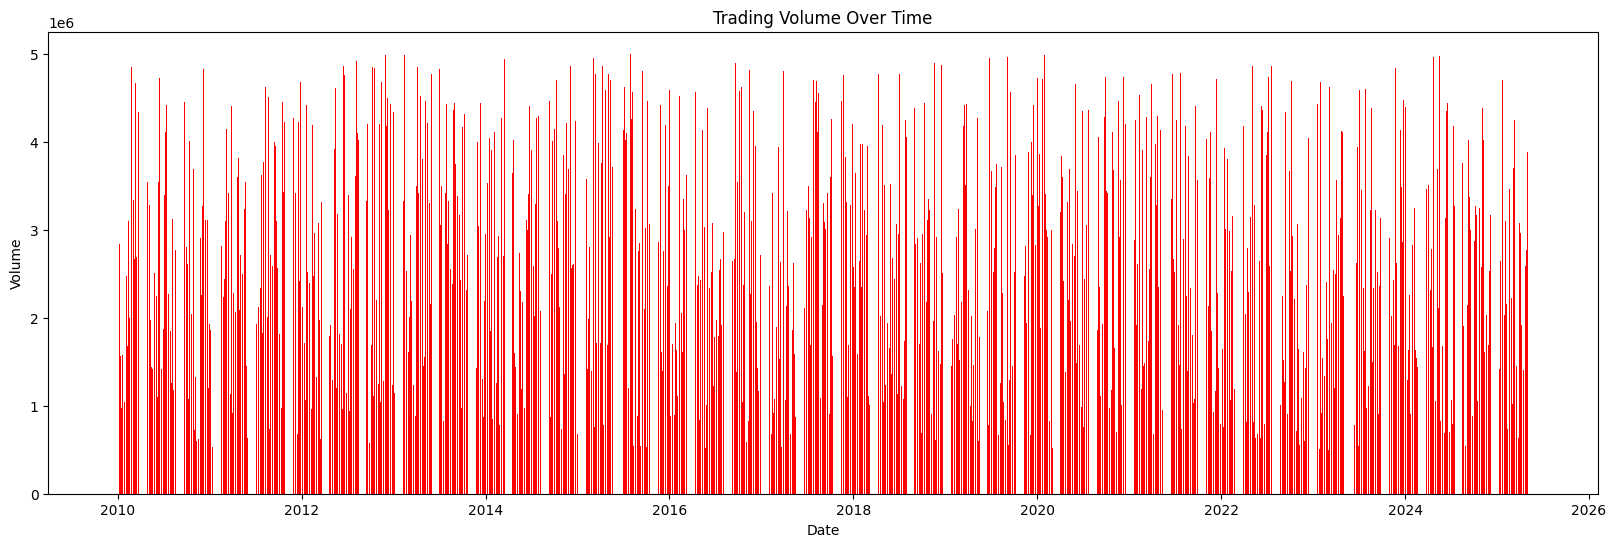

In [152]:
plt.figure(figsize=(20,6))
plt.bar(df['Date'], df['Volume'], color='red')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

### Daily Returns Distribution

This histogram illustrates the distribution of daily returns for the stock. 
The Kernel Density Estimate (KDE) overlay provides a smooth approximation 
of the return distribution, highlighting the shape, skewness, and potential 
fat tails in the data.

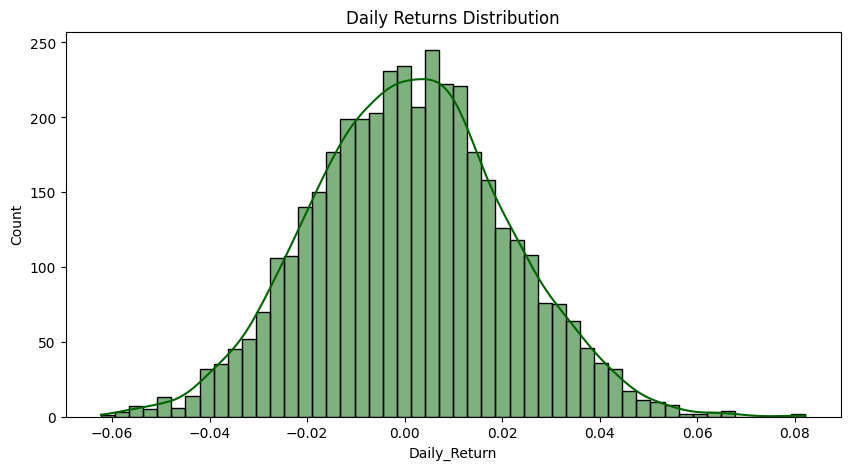

In [147]:
plt.figure(figsize=(10,5))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True, color='darkgreen')
plt.title("Daily Returns Distribution")
plt.show()

### Close Price Boxplot

This boxplot visualizes the distribution of Close_Price .

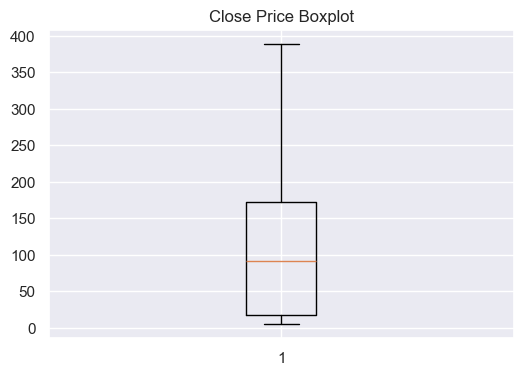

In [22]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Close_Price'])
plt.title("Close Price Boxplot")
plt.show()

### Rolling Volatility (21-Day Window)

This chart illustrates the rolling volatility of daily returns calculated 
using a 21-day moving window. Volatility measures the degree of variation 
in returns over time and serves as an indicator of market risk and uncertainty.

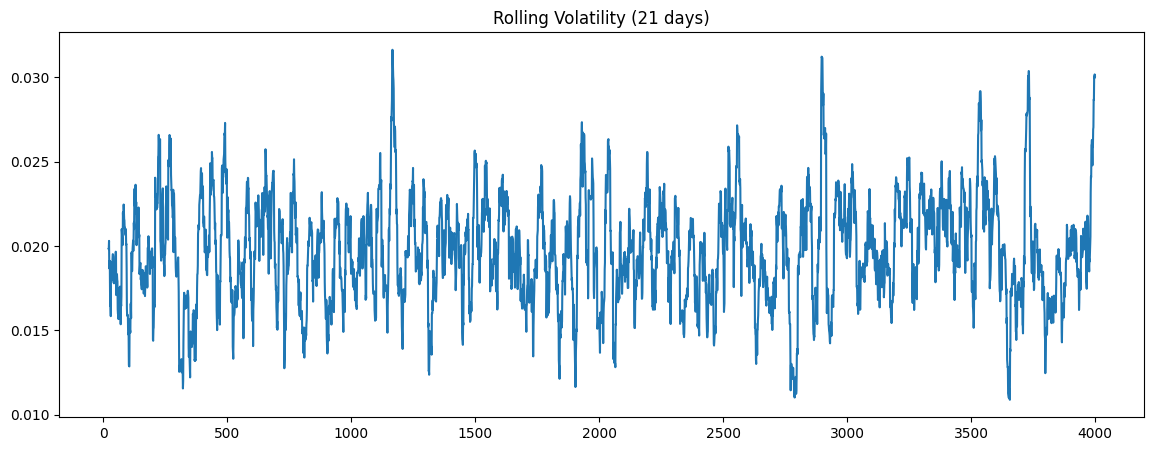

In [13]:
df['Volatility'] = df['Daily_Return'].rolling(21).std()

plt.figure(figsize=(14,5))
plt.plot(df['Volatility'])
plt.title("Rolling Volatility (21 days)")
plt.show()

### Pairplot: Close Price, Volume, ASE Index & Daily Return

This pairplot shows scatterplots of each pair of variables and the distribution of each variable on the diagonal. It helps to visually identify correlations, trends, and potential outliers among the following variables:

Close_Price: The daily closing price of the stock

Volume: The trading volume for each day

ASE_General_Index: The general market index

Daily_Return: The percentage change in Close_Price from the previous day

By examining these plots, we can better understand relationships in the data, detect patterns, and identify potential anomalies that could impact forecasting or further analysis.

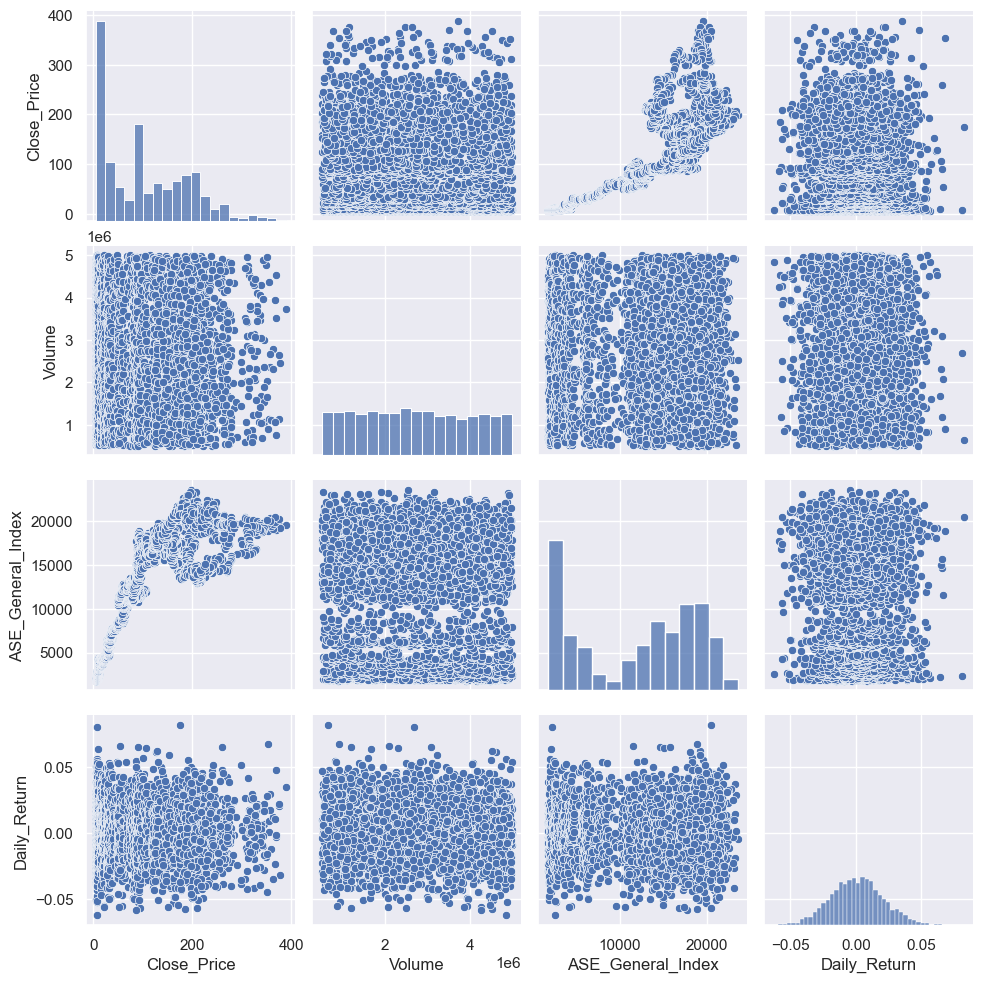

In [36]:
sns.pairplot(df[['Close_Price','Volume','ASE_General_Index','Daily_Return']].dropna())
plt.show()

### Correlation Heatmap

This heatmap shows the strength and direction of relationships between numerical variables. Darker colors indicate stronger correlations, while annotated values provide the exact coefficients. It helps identify variable relationships and potential multicollinearity.

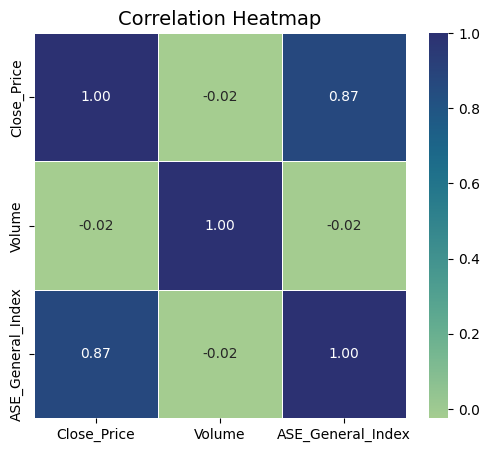

In [159]:
plt.figure(figsize=(6,5))
sns.heatmap(
    df[['Close_Price', 'Volume', 'ASE_General_Index']].corr(),
    annot=True,        
    fmt=".2f",         
    cmap="crest",     
    linewidths=0.5,    
    cbar=True          
)

plt.title("Correlation Heatmap", fontsize=14)
plt.show()

### Histograms

Histograms of all numerical features show the spread of data, highlighting skewness, outliers, and general patterns. This provides a clear overview of the dataset and informs preprocessing steps, such as scaling, transformation, or feature selection, before modeling

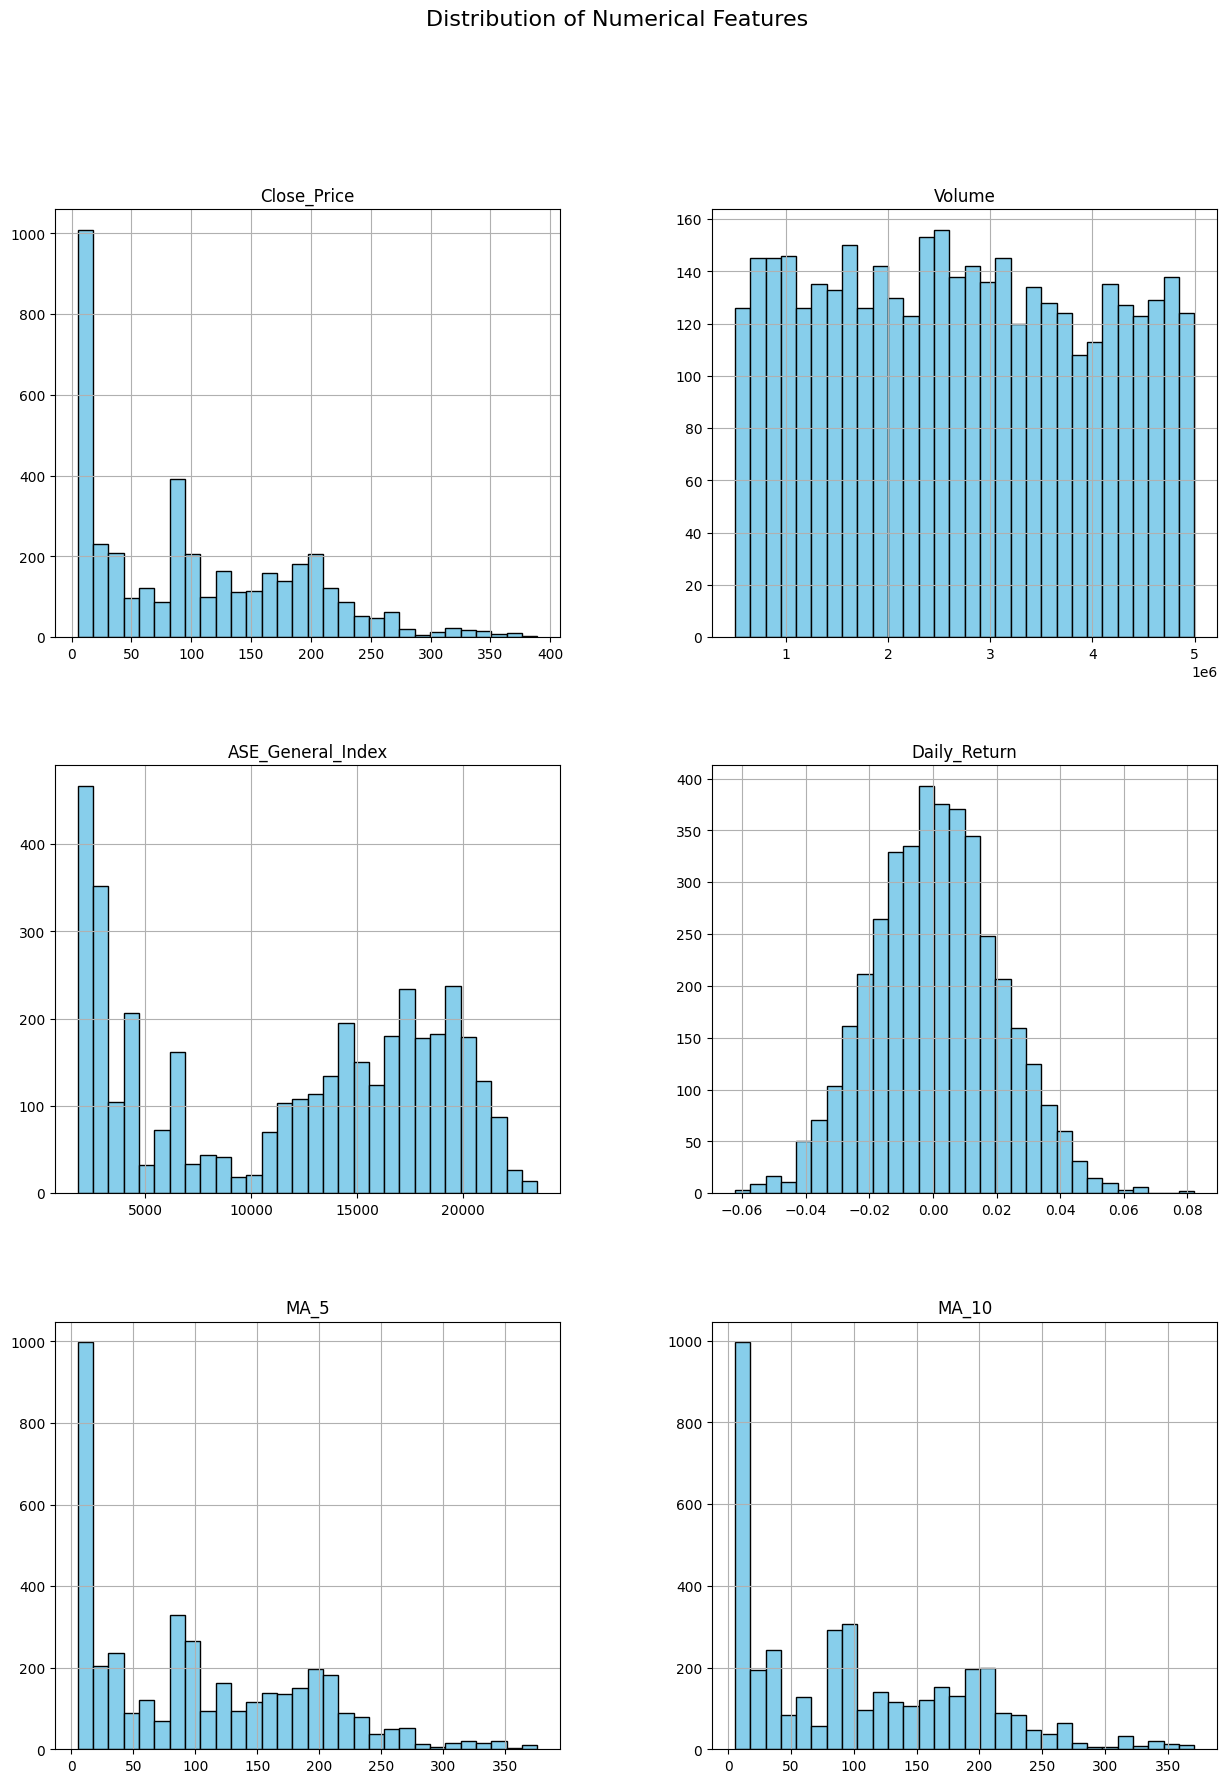

In [157]:
num_df = df.select_dtypes(include=['float64', 'int64'])

num_df.hist(figsize=(15,20), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

### Rolling Mean Visualization of Features

This set of line plots shows the rolling mean trends for selected numerical features over time, smoothing short-term fluctuations.

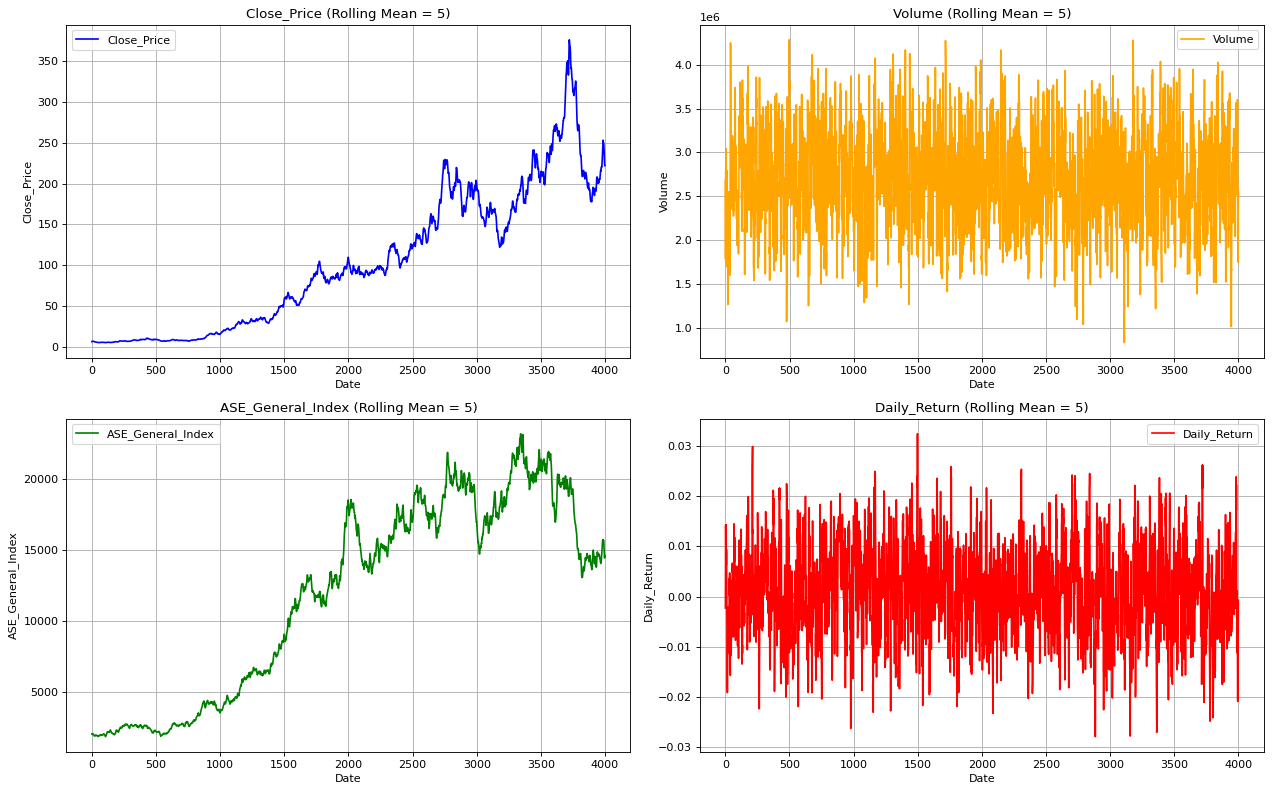

In [146]:
import math

def show_raw_visualization(data, feature_keys, window=12):

    n_features = len(feature_keys)
    n_cols = 2
    n_rows = math.ceil(n_features / n_cols)

    colors = ["blue","orange","green","red","purple",
              "brown","pink","gray","olive","cyan"]

    fig, axes = plt.subplots(
        nrows=n_rows,
        ncols=n_cols,
        figsize=(16, 5 * n_rows),
        dpi=80
    )

    axes = axes.flatten()

    for i, key in enumerate(feature_keys):
        color = colors[i % len(colors)]

        plot_data = data[key].rolling(
            window=window,
            min_periods=1
        ).mean()

        axes[i].plot(plot_data, color=color)
        axes[i].set_title(f"{key} (Rolling Mean = {window})")
        axes[i].set_xlabel("Date")
        axes[i].set_ylabel(key)
        axes[i].grid(True)
        axes[i].legend([key])

    # حذف أي subplot فاضي
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
features = ['Close_Price', 'Volume', 'ASE_General_Index', 'Daily_Return']
show_raw_visualization(df, features, window=5)

# Step 4 | Classical Time Series Analysis and Forecasting

In [10]:
y = df["Close_Price"]

### Step 4.1 | Visualize the series

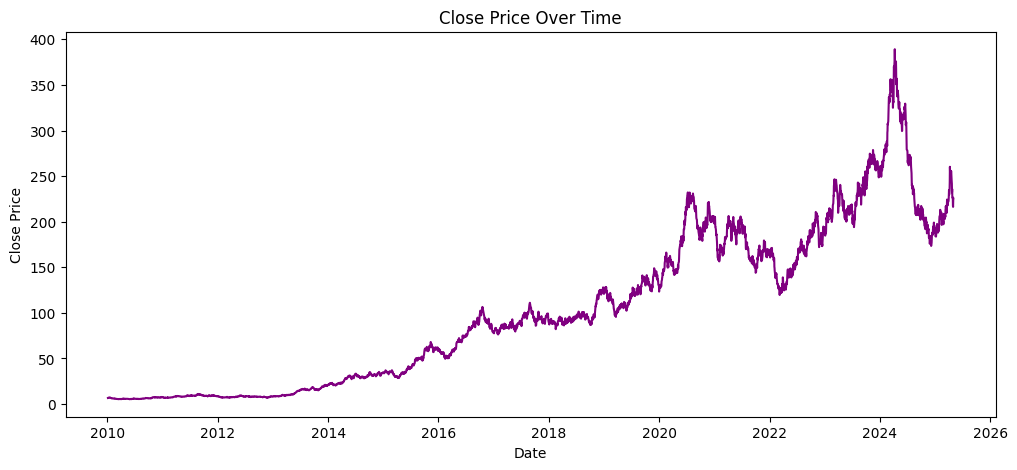

In [70]:
plt.figure(figsize=(12,5))
plt.plot(y, color='purple')
plt.title("Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

### Step 4.2 | Check stationarity (ADF test)

✅ Decision rule

p-value < 0.05 → stationary

p-value ≥ 0.05 → NOT stationary

In [71]:
result = adfuller(y)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("==============================")
if result[1] <= 0.05:
    print(" The time series is stationary ")
else:
    print("❌ The time series is non-stationary ❌")

ADF Statistic: -0.9730230574573887
p-value: 0.7629759399592244
❌ The time series is non-stationary ❌


### Step 4.3 | Make it stationary (if needed)

In [72]:
y_diff = y.diff().dropna()
result_diff = adfuller(y_diff)
print("ADF Statistic (1st Diff):", result_diff[0])
print("p-value (1st Diff):", result_diff[1])
print("==============================")
if result_diff[1] <= 0.05:
    print(" The differenced time series is stationary ")
else:
    print("❌ The differenced time series is non-stationary ❌")

ADF Statistic (1st Diff): -12.048633633693031
p-value (1st Diff): 2.628879859191199e-22
 The differenced time series is stationary 


p-value ≪ 0.05

✅ Stationary achieved

d = 1

### Step 4.4 | choosing p and q for ARIMA from ACF/PACF charts

PACF → for p (AR term)

Look for the first lag that drops below significance (the confidence interval)

Example: PACF cuts off after lag 2 → p=2

ACF → for q (MA term)

Look for first lag that cuts off

Example: ACF cuts off after lag 1 → q=1

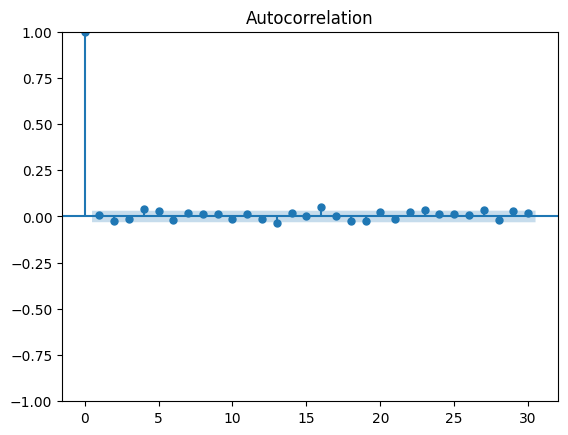

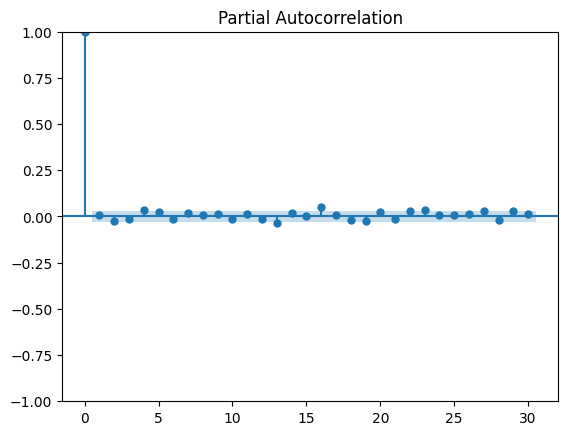

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y_diff, lags=30)
plt.show()

plot_pacf(y_diff, lags=30)
plt.show()

In [ ]:

from pmdarima import auto_arima

step_model = auto_arima(df['Close_Price'], start_p=0, start_q=0,
                        max_p=5, max_q=5, seasonal=False,
                        d=None, trace=True, error_action='ignore', suppress_warnings=True)

print(step_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19353.798, Time=0.55 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19355.662, Time=0.63 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19355.655, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19353.416, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19357.777, Time=0.94 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.294 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4000
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9675.708
Date:                Mon, 22 Dec 2025   AIC                          19353.416
Time:                        15:28:01   BIC                          19359.710
Sample:                    01-04-2010   HQIC                         19355.647
                         - 05-02-2025                                  

### Step 4.5 | Fit ARIMA Model

In [77]:
arima_model = ARIMA(y, order=(1, 1, 1))
arima_result = arima_model.fit()

print(arima_result.summary())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Close_Price   No. Observations:                 4000
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9675.690
Date:                Mon, 22 Dec 2025   AIC                          19357.380
Time:                        15:12:54   BIC                          19376.261
Sample:                    01-04-2010   HQIC                         19364.073
                         - 05-02-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4873      2.272      0.215      0.830      -3.965       4.939
ma.L1         -0.4899      2.268     -0.216      0.829      -4.934       3.955
sigma2         7.3968      0.085     86.546      0.0

### Step 4.6 | Forecast future values

In [92]:
forecast = arima_result.forecast(steps=5)
print(forecast)

2025-05-05    225.298374
2025-05-06    225.293726
2025-05-07    225.291461
2025-05-08    225.290357
2025-05-09    225.289820
Freq: B, Name: predicted_mean, dtype: float64


### Step 4.7 | Plot actual vs forecast

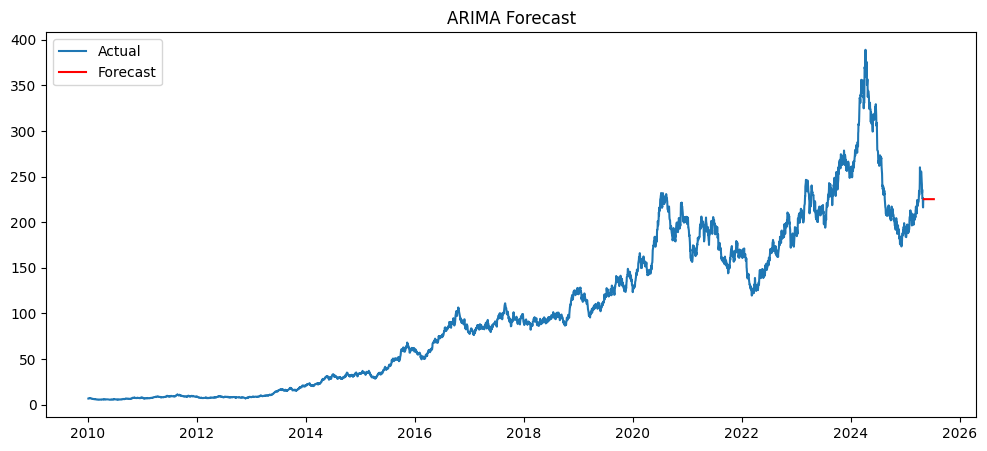

In [81]:
plt.figure(figsize=(12,5))
plt.plot(y, label="Actual")
plt.plot(forecast, label="Forecast", color="red")
plt.legend()
plt.title("ARIMA Forecast")
plt.show()

### Step 4.8 | Train / Test split (recommended)

In [93]:
train = y[:-30]
test = y[-30:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

pred = model_fit.forecast(steps=len(test))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


### Step 4.9 | Evaluate the model

In [89]:
mse = mean_squared_error(test, pred)
mae = mean_absolute_error(test, pred)
mape = np.mean(np.abs((test - pred) / test)) * 100
print(f"MAPE: {mape}%")
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MAPE: 5.161466721275801%
MSE: 276.5371780556296
MAE: 12.617258520007672
RMSE: 16.62940702657884


### Step 4.10 | Model diagnostics 

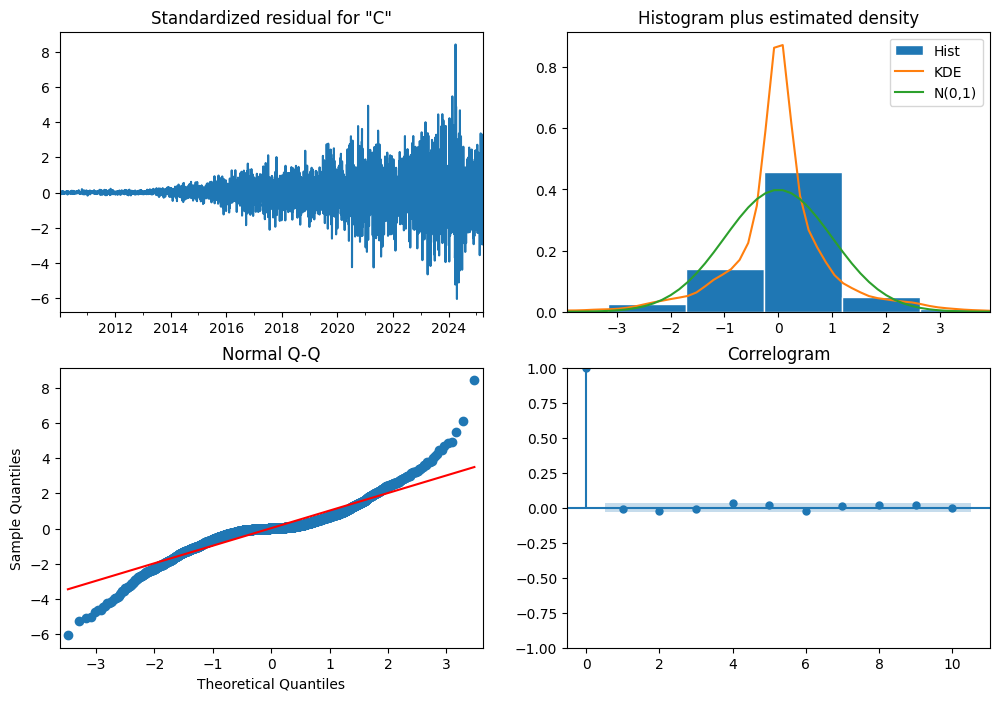

In [94]:
model_fit.plot_diagnostics(figsize=(12,8))
plt.show()

# Step 5 | machine learning 

In [14]:

def set_seed(seed=62):
 
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

data = df[features].values
input_dim = len(features)

LSTM

epoch [1/150] | Train Loss: 0.003464 | Val Loss: 0.116260 | 
epoch [11/150] | Train Loss: 0.005957 | Val Loss: 0.064499 | 
epoch [21/150] | Train Loss: 0.003868 | Val Loss: 0.051477 | 
epoch [31/150] | Train Loss: 0.003547 | Val Loss: 0.040462 | 
epoch [41/150] | Train Loss: 0.003750 | Val Loss: 0.029440 | 
epoch [51/150] | Train Loss: 0.003399 | Val Loss: 0.021611 | 
epoch [61/150] | Train Loss: 0.002818 | Val Loss: 0.017026 | 
epoch [71/150] | Train Loss: 0.002331 | Val Loss: 0.014419 | 
epoch [81/150] | Train Loss: 0.002263 | Val Loss: 0.011463 | 
epoch [91/150] | Train Loss: 0.001969 | Val Loss: 0.009516 | 
epoch [101/150] | Train Loss: 0.001276 | Val Loss: 0.006350 | 
epoch [111/150] | Train Loss: 0.001182 | Val Loss: 0.004162 | 
epoch [121/150] | Train Loss: 0.000938 | Val Loss: 0.003312 | 
epoch [131/150] | Train Loss: 0.000614 | Val Loss: 0.004971 | 
epoch [141/150] | Train Loss: 0.000874 | Val Loss: 0.006556 | 
epoch [150/150] | Train Loss: 0.000618 | Val Loss: 0.013867 | 


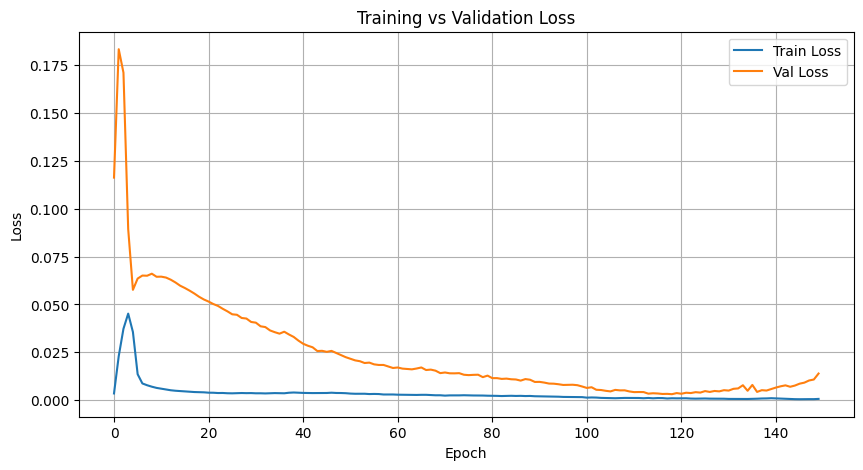


--- Validation Summary ---

  MAE:  15.9100
  RMSE: 27.0209
  R2:   0.7143
  MAPE: 5.95%
  Mean Residual: 13.0983
  Std Residual:  23.6339


In [19]:
set_seed(62)
model = LSTMModel(
    input_dim=input_dim,
    hidden_dim=64,
    num_layers=2,
    dropout=0.3,
    bidirectional=False
)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trainer = TimeSeriesTrainerSimple2(
    model=model,
    seq_len=20,
    batch_size=32,
    epochs=150,
    lr=0.001,
    criterion=criterion,
    optimizer=optimizer,
    early_stopping=False
)

results = trainer.train(data)


c:\Users\user\OneDrive\Desktop\New folder\Material.py:559: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


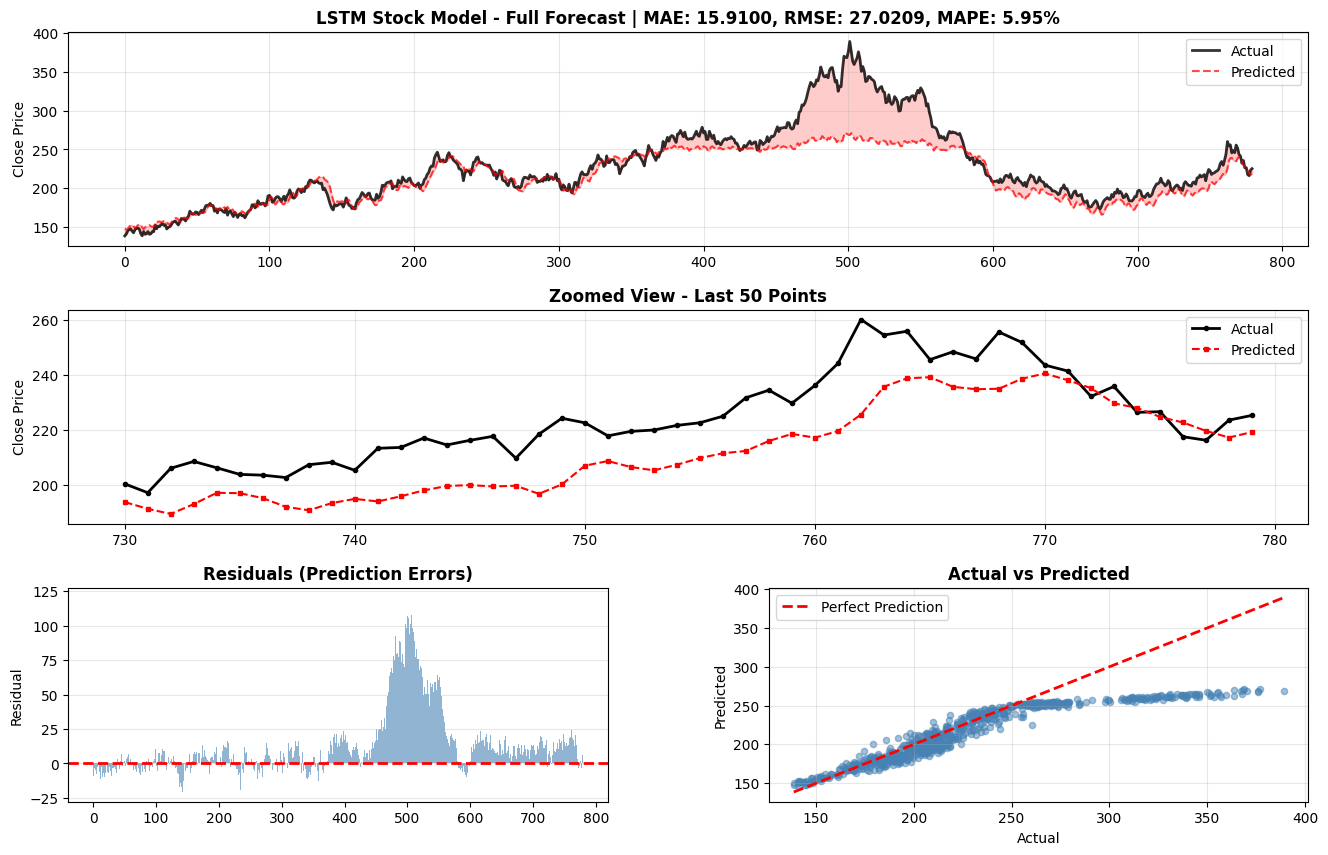


  LSTM Stock Model - Performance Summary
  MAE:  15.9100
  RMSE: 27.0209
  MAPE: 5.95%
  Mean Residual: 13.0983
  Std Residual:  23.6339

  Model Quality: ✅ Very Good


{'MAE': 15.909993171691895,
 'RMSE': 27.020914525184814,
 'MAPE': 5.951094999909401,
 'Mean Residual': 13.098332,
 'Std Residual': 23.633947}

In [20]:
trainer.plot_forecast(
    y_true=results['y_true'],
    y_pred=results['y_pred'],
    model_name="LSTM Stock Model",
    zoom_last_n=50
)

BI_LSTM

epoch [1/150] | Train Loss: 0.003220 | Val Loss: 0.109658 | 
epoch [11/150] | Train Loss: 0.004677 | Val Loss: 0.037149 | 
epoch [21/150] | Train Loss: 0.003693 | Val Loss: 0.024452 | 
epoch [31/150] | Train Loss: 0.003360 | Val Loss: 0.020047 | 
epoch [41/150] | Train Loss: 0.002871 | Val Loss: 0.012836 | 
epoch [51/150] | Train Loss: 0.002505 | Val Loss: 0.010260 | 
epoch [61/150] | Train Loss: 0.002439 | Val Loss: 0.010518 | 
epoch [71/150] | Train Loss: 0.002248 | Val Loss: 0.010044 | 
epoch [81/150] | Train Loss: 0.001952 | Val Loss: 0.008443 | 
epoch [91/150] | Train Loss: 0.002187 | Val Loss: 0.008094 | 
epoch [101/150] | Train Loss: 0.001098 | Val Loss: 0.004904 | 
epoch [111/150] | Train Loss: 0.000962 | Val Loss: 0.002990 | 
epoch [121/150] | Train Loss: 0.000866 | Val Loss: 0.001157 | 
epoch [131/150] | Train Loss: 0.000767 | Val Loss: 0.001206 | 
epoch [141/150] | Train Loss: 0.000823 | Val Loss: 0.001086 | 
epoch [150/150] | Train Loss: 0.000318 | Val Loss: 0.003440 | 


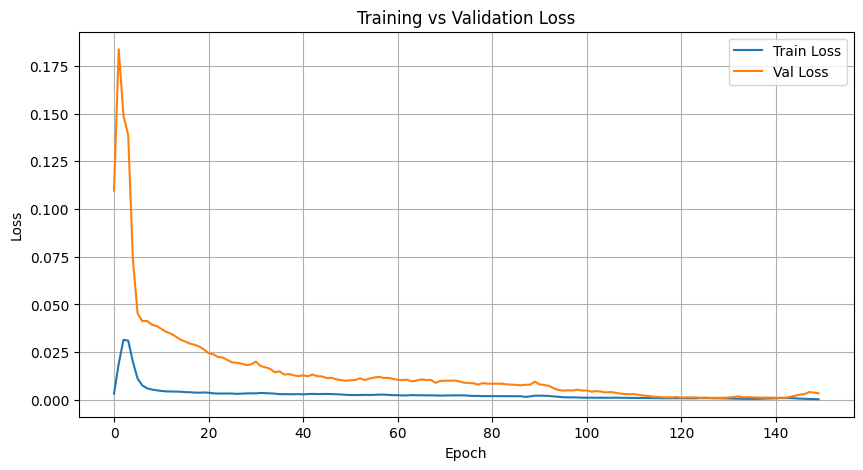


--- Validation Summary ---

  MAE:  10.5897
  RMSE: 13.3862
  R2:   0.9299
  MAPE: 4.36%
  Mean Residual: -8.1092
  Std Residual:  10.6504


'last_seq = data[-trainer.seq_len:] \n\n# Predict the next 5 steps\nfuture_preds = trainer.predict(last_seq, n_steps=5)\nprint("Next 5 predicted Close prices:", future_preds)'

In [22]:

set_seed(62)
model = LSTMModel(
    input_dim=input_dim,
    hidden_dim=64,
    num_layers=2,
    dropout=0.3,
    bidirectional=True
)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trainer = TimeSeriesTrainerSimple2(
    model=model,
    seq_len=20,
    batch_size=32,
    epochs=150,
    lr=0.001,
    criterion=criterion,
    optimizer=optimizer,
    early_stopping=False
)

results = trainer.train(data)
"""last_seq = data[-trainer.seq_len:] 

# Predict the next 5 steps
future_preds = trainer.predict(last_seq, n_steps=5)
print("Next 5 predicted Close prices:", future_preds)"""

c:\Users\user\OneDrive\Desktop\New folder\Material.py:559: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


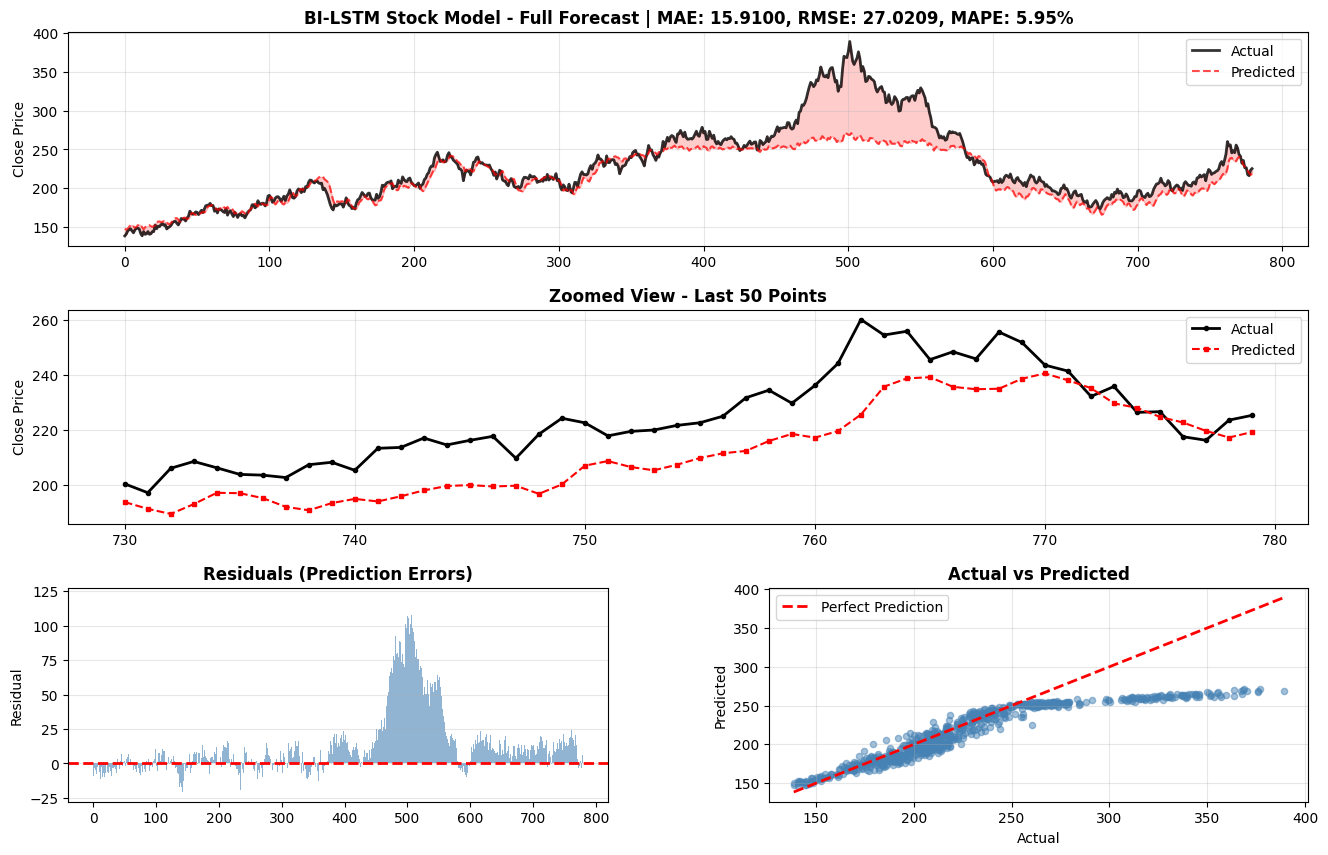


  BI-LSTM Stock Model - Performance Summary
  MAE:  15.9100
  RMSE: 27.0209
  MAPE: 5.95%
  Mean Residual: 13.0983
  Std Residual:  23.6339

  Model Quality: ✅ Very Good


{'MAE': 15.909993171691895,
 'RMSE': 27.020914525184814,
 'MAPE': 5.951094999909401,
 'Mean Residual': 13.098332,
 'Std Residual': 23.633947}

In [21]:
trainer.plot_forecast(
    y_true=results['y_true'],
    y_pred=results['y_pred'],
    model_name="BI-LSTM Stock Model",
    zoom_last_n=50
)

GRU

Epoch [1/150] | Train Loss: 0.003164 | Val Loss: 0.079227 | 
Epoch [11/150] | Train Loss: 0.005117 | Val Loss: 0.073183 | 
Epoch [21/150] | Train Loss: 0.003163 | Val Loss: 0.046569 | 
Epoch [31/150] | Train Loss: 0.002730 | Val Loss: 0.081774 | 
Epoch [41/150] | Train Loss: 0.002654 | Val Loss: 0.043351 | 
Epoch [51/150] | Train Loss: 0.002722 | Val Loss: 0.054668 | 
Epoch [61/150] | Train Loss: 0.002055 | Val Loss: 0.040029 | 
Epoch [71/150] | Train Loss: 0.002512 | Val Loss: 0.042982 | 
Epoch [81/150] | Train Loss: 0.001579 | Val Loss: 0.031451 | 
Epoch [91/150] | Train Loss: 0.001773 | Val Loss: 0.023862 | 
Epoch [101/150] | Train Loss: 0.001581 | Val Loss: 0.022077 | 
Epoch [111/150] | Train Loss: 0.001222 | Val Loss: 0.017886 | 
Epoch [121/150] | Train Loss: 0.000927 | Val Loss: 0.014211 | 
Epoch [131/150] | Train Loss: 0.002143 | Val Loss: 0.022890 | 
Epoch [141/150] | Train Loss: 0.000851 | Val Loss: 0.015363 | 
Epoch [150/150] | Train Loss: 0.000965 | Val Loss: 0.014000 | 


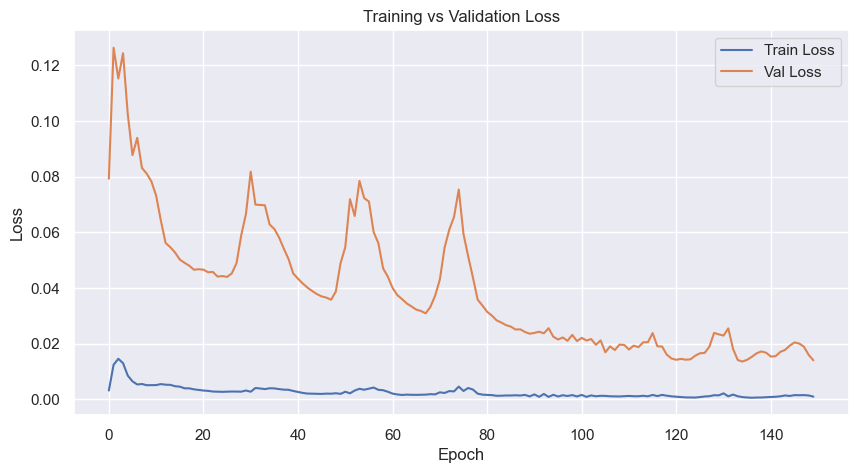


--- Validation Summary (REAL SCALE) ---
RMSE: 27.1373
MAE : 15.2401
R²  : 0.7111


In [8]:
features = ["Close_Price","Volume","ASE_General_Index","MA_5","MA_10"]

df.dropna(inplace=True)
data = df[features].values
input_dim = len(features)

model = GRUModel(
    input_dim=input_dim,
    hidden_dim=64,
    num_layers=2,
    dropout=0.3,
)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trainer = TimeSeriesTrainerSimple(
    model=model,
    seq_len=20,
    batch_size=32,
    epochs=150,
    lr=0.001,
    criterion=criterion,
    optimizer=optimizer,
    early_stopping=False
)

results = trainer.train(data)




RNN

features = ["Close_Price","Volume","ASE_General_Index","MA_5","MA_10"]

df.dropna(inplace=True)
data = df[features].values
input_dim = len(features)

model = RNNModel(
    input_dim=input_dim,
    hidden_dim=64,
    num_layers=2,
    dropout=0.3,
)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trainer = TimeSeriesTrainerSimple(
    model=model,
    seq_len=20,
    batch_size=32,
    epochs=150,
    lr=0.001,
    criterion=criterion,
    optimizer=optimizer
)

results = trainer.train(data)


COMPREHENSIVE LEAKAGE DETECTION SYSTEM
Jordan Kuwait Bank Stock Analysis

📂 Loading: JORDAN KUWAIT BANK.xlsx
✅ Loaded 5744 clean data points

STEP 1: RAW DATA ANALYSIS
✓ Total samples: 5744
✓ Price range: $1.300000 to $13.870000
✓ Mean price: $4.430735
✓ Std deviation: $2.673455
✓ Coefficient of Variation: 60.34%

📊 Daily Price Changes:
   Mean absolute change: $0.050777
   Median absolute change: $0.020000
   Max change: $3.810000
   Mean % change: 1.0412%

📈 Autocorrelation (lag-1): 0.998958
   🚨 EXTREME autocorrelation! Prices highly predictable from yesterday.

📊 Mean shift between halves: 111.74%
   ⚠️  Large mean shift - non-stationary data

STEP 2: TRAIN/TEST SPLIT VERIFICATION
✓ Total data points: 5744
✓ 80% split index: 4595
✓ Gap size: 60 days
✓ Train ends at: 4535
✓ Test starts at: 4535

📊 Split sizes:
   Train: 4535 samples
   Gap: 60 samples
   Test: 1209 samples

🔍 Overlap check:
   Last 3 train values: [6.11 6.09 6.05]
   First 3 test values: [5.9  5.94 5.96]
   ✅ No ov

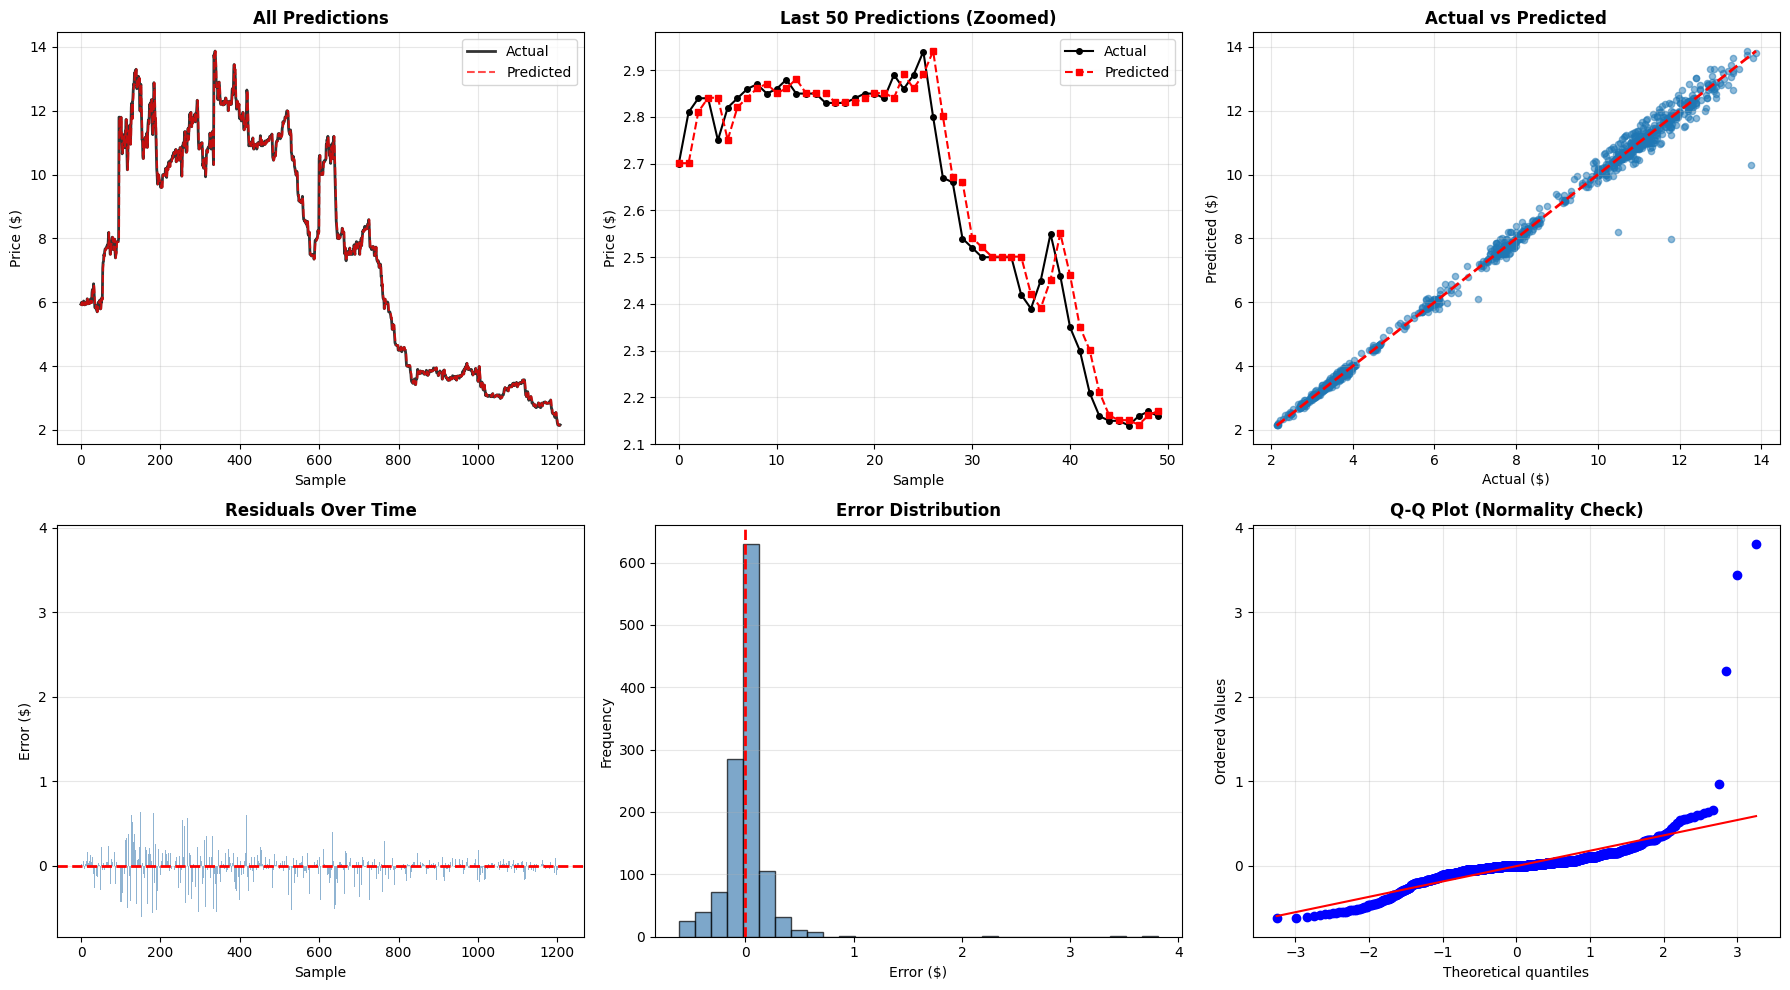


✅ Analysis complete!


In [11]:
"""
COMPREHENSIVE LEAKAGE DETECTION - Step by Step Analysis
Jordan Kuwait Bank Stock Predictor
"""

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats


class LeakageDetector:
    """Comprehensive leakage detection system"""
    
    def __init__(self, seq_len=60):
        self.seq_len = seq_len
        self.model = LinearRegression()
        self.leakage_flags = []
        
    def step1_analyze_raw_data(self, data):
        """STEP 1: Analyze raw data characteristics"""
        print("\n" + "="*70)
        print("STEP 1: RAW DATA ANALYSIS")
        print("="*70)
        
        data = np.asarray(data).flatten()
        
        print(f"✓ Total samples: {len(data)}")
        print(f"✓ Price range: ${data.min():.6f} to ${data.max():.6f}")
        print(f"✓ Mean price: ${data.mean():.6f}")
        print(f"✓ Std deviation: ${data.std():.6f}")
        print(f"✓ Coefficient of Variation: {(data.std() / data.mean() * 100):.2f}%")
        
        # Daily changes
        daily_changes = np.diff(data)
        abs_changes = np.abs(daily_changes)
        pct_changes = (daily_changes / data[:-1]) * 100
        
        print(f"\n📊 Daily Price Changes:")
        print(f"   Mean absolute change: ${abs_changes.mean():.6f}")
        print(f"   Median absolute change: ${np.median(abs_changes):.6f}")
        print(f"   Max change: ${abs_changes.max():.6f}")
        print(f"   Mean % change: {np.abs(pct_changes).mean():.4f}%")
        
        # Volatility check
        if abs_changes.mean() < 0.01:
            print(f"\n🚨 WARNING: Very low volatility (avg change < $0.01)")
            print(f"   This stock barely moves! Any model will look good by copying yesterday.")
            self.leakage_flags.append("LOW_VOLATILITY")
        
        # Autocorrelation
        lag1_corr = np.corrcoef(data[:-1], data[1:])[0, 1]
        print(f"\n📈 Autocorrelation (lag-1): {lag1_corr:.6f}")
        if lag1_corr > 0.99:
            print(f"   🚨 EXTREME autocorrelation! Prices highly predictable from yesterday.")
            self.leakage_flags.append("HIGH_AUTOCORR")
        elif lag1_corr > 0.95:
            print(f"   ⚠️  Very high autocorrelation - stock is very stable")
        
        # Stationarity
        if len(data) > 10:
            first_half_mean = data[:len(data)//2].mean()
            second_half_mean = data[len(data)//2:].mean()
            mean_diff_pct = abs(second_half_mean - first_half_mean) / first_half_mean * 100
            print(f"\n📊 Mean shift between halves: {mean_diff_pct:.2f}%")
            if mean_diff_pct > 20:
                print(f"   ⚠️  Large mean shift - non-stationary data")
        
        print("="*70)
        return data
    
    def step2_split_verification(self, data):
        """STEP 2: Verify train/test split has no overlap"""
        print("\n" + "="*70)
        print("STEP 2: TRAIN/TEST SPLIT VERIFICATION")
        print("="*70)
        
        split_idx = int(len(data) * 0.8)
        
        print(f"✓ Total data points: {len(data)}")
        print(f"✓ 80% split index: {split_idx}")
        print(f"✓ Gap size: {self.seq_len} days")
        print(f"✓ Train ends at: {split_idx - self.seq_len}")
        print(f"✓ Test starts at: {split_idx - self.seq_len}")
        
        train_data = data[:split_idx - self.seq_len]
        test_data = data[split_idx - self.seq_len:]
        gap_data = data[split_idx - self.seq_len:split_idx]
        
        print(f"\n📊 Split sizes:")
        print(f"   Train: {len(train_data)} samples")
        print(f"   Gap: {len(gap_data)} samples")
        print(f"   Test: {len(test_data)} samples")
        
        # Check for overlap
        train_last_10 = train_data[-10:]
        test_first_10 = test_data[:10]
        
        print(f"\n🔍 Overlap check:")
        print(f"   Last 3 train values: {train_last_10[-3:]}")
        print(f"   First 3 test values: {test_first_10[:3]}")
        
        if np.any(np.isin(train_last_10, test_first_10)):
            print(f"   🚨 OVERLAP DETECTED!")
            self.leakage_flags.append("TRAIN_TEST_OVERLAP")
        else:
            print(f"   ✅ No overlap - Good!")
        
        print("="*70)
        return train_data, test_data
    
    def step3_raw_data_prep(self, train_data, test_data):
        """STEP 3: Prepare raw data (NO SCALING)"""
        print("\n" + "="*70)
        print("STEP 3: RAW DATA PREPARATION (NO SCALING)")
        print("="*70)
        
        train_data = train_data.reshape(-1, 1)
        test_data = test_data.reshape(-1, 1)
        
        print(f"✓ Using RAW prices - no normalization!")
        print(f"\n📊 Train data:")
        print(f"   Min: ${train_data.min():.4f}")
        print(f"   Max: ${train_data.max():.4f}")
        print(f"   Mean: ${train_data.mean():.4f}")
        
        print(f"\n📊 Test data:")
        print(f"   Min: ${test_data.min():.4f}")
        print(f"   Max: ${test_data.max():.4f}")
        print(f"   Mean: ${test_data.mean():.4f}")
        
        print(f"\n✅ No scaling applied - working with actual dollar values")
        
        print("="*70)
        return train_data, test_data
    
    def step4_direct_prediction(self, train_raw, test_raw):
        """STEP 4: Direct next-day prediction (NO SEQUENCES, NO SCALING)"""
        print("\n" + "="*70)
        print("STEP 4: DIRECT PREDICTION SETUP (RAW PRICES)")
        print("="*70)
        
        print(f"✓ Using simple next-day prediction:")
        print(f"   Input: price at day t (raw $)")
        print(f"   Target: price at day t+1 (raw $)")
        print(f"   NO scaling, NO sequences!")
        
        # Simple: X = prices[:-1], y = prices[1:]
        X_train = train_raw[:-1]  # All but last
        y_train = train_raw[1:, 0]   # All but first
        
        X_test = test_raw[:-1]
        y_test = test_raw[1:, 0]
        
        print(f"\n✓ Data shapes:")
        print(f"   X_train: {X_train.shape}")
        print(f"   y_train: {y_train.shape}")
        print(f"   X_test: {X_test.shape}")
        print(f"   y_test: {y_test.shape}")
        
        # Verify no overlap
        print(f"\n🔍 Leakage check:")
        print(f"   Input (day t): ${X_train[0, 0]:.4f}")
        print(f"   Target (day t+1): ${y_train[0]:.4f}")
        
        if X_train[0, 0] == y_train[0]:
            print(f"   🚨 TARGET EQUALS INPUT! Leakage!")
            self.leakage_flags.append("TARGET_IN_INPUT")
        else:
            print(f"   ✅ Target is next day - Good!")
        
        print(f"\n✓ All values in REAL DOLLARS - no transformations")
        
        print("="*70)
        return X_train, y_train, X_test, y_test
    
    def step5_model_training(self, X_train, y_train):
        """STEP 5: Train model and inspect"""
        print("\n" + "="*70)
        print("STEP 5: MODEL TRAINING")
        print("="*70)
        
        print(f"✓ Training Linear Regression...")
        self.model.fit(X_train, y_train)
        
        # Inspect coefficients
        coeffs = self.model.coef_
        intercept = self.model.intercept_
        
        print(f"\n📊 Model parameters:")
        print(f"   Coefficients: {coeffs}")
        print(f"   Intercept: {intercept:.6f}")
        
        print(f"\n🔍 Model interpretation:")
        print(f"   The model learned: y = {coeffs[0]:.6f} * x + {intercept:.6f}")
        
        if abs(coeffs[0] - 1.0) < 0.05 and abs(intercept) < 0.05:
            print(f"   🚨 Model essentially learned: y ≈ x")
            print(f"   → Just copying today's price to predict tomorrow!")
            self.leakage_flags.append("COPYING_INPUT")
        else:
            print(f"   ✅ Model has non-trivial transformation")
        
        print("="*70)
    
    def step6_prediction_analysis(self, X_test, y_test):
        """STEP 6: Make predictions and analyze (RAW PRICES)"""
        print("\n" + "="*70)
        print("STEP 6: PREDICTION ANALYSIS (RAW PRICES)")
        print("="*70)
        
        # Predict (no inverse transform needed!)
        y_pred = self.model.predict(X_test)
        y_true = y_test
        
        print(f"✓ Made {len(y_pred)} predictions")
        
        # Basic metrics
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
        
        print(f"\n📊 Basic Metrics (Real Dollar Values):")
        print(f"   MAE:  ${mae:.4f}")
        print(f"   RMSE: ${rmse:.4f}")
        print(f"   R²:   {r2:.6f}")
        print(f"   MAPE: {mape:.4f}%")
        
        if r2 > 0.99:
            print(f"   🚨 R² > 0.99 - Suspiciously high!")
            self.leakage_flags.append("SUSPICIOUSLY_HIGH_R2")
        
        # Show sample predictions
        print(f"\n📋 Sample predictions (first 5):")
        print(f"   {'Actual':>12} {'Predicted':>12} {'Error':>12} {'Error%':>10}")
        for i in range(min(5, len(y_true))):
            err = y_true[i] - y_pred[i]
            err_pct = (err / y_true[i]) * 100
            print(f"   ${y_true[i]:>11.4f} ${y_pred[i]:>11.4f} ${err:>11.4f} {err_pct:>9.2f}%")
        
        print("="*70)
        return y_true, y_pred
    
    def step7_leakage_tests(self, y_true, y_pred, original_test_data):
        """STEP 7: Comprehensive leakage detection tests"""
        print("\n" + "="*70)
        print("STEP 7: LEAKAGE DETECTION TESTS")
        print("="*70)
        
        test_results = {}
        
        # TEST 1: Naive baseline comparison
        print(f"\n🧪 TEST 1: Naive Baseline Comparison")
        naive_pred = np.roll(y_true, 1)[1:]
        naive_mae = mean_absolute_error(y_true[1:], naive_pred)
        model_mae = mean_absolute_error(y_true, y_pred)
        
        print(f"   Naive MAE (predict yesterday): ${naive_mae:.6f}")
        print(f"   Model MAE: ${model_mae:.6f}")
        
        if model_mae < naive_mae:
            improvement = ((naive_mae - model_mae) / naive_mae) * 100
            print(f"   ✅ Model beats baseline by {improvement:.2f}%")
            test_results['baseline'] = 'PASS'
        else:
            worse = ((model_mae - naive_mae) / naive_mae) * 100
            print(f"   ❌ Model WORSE than baseline by {worse:.2f}%")
            test_results['baseline'] = 'FAIL'
            self.leakage_flags.append("WORSE_THAN_BASELINE")
        
        # TEST 2: Shift correlation (classic leakage test)
        print(f"\n🧪 TEST 2: Shift Correlation Test")
        if len(y_true) > 1:
            shift_corr = np.corrcoef(y_true[:-1], y_pred[1:])[0, 1]
            print(f"   Correlation(actual[t], pred[t+1]): {shift_corr:.6f}")
            print(f"   Expected: < 0.90 for true prediction")
            
            if shift_corr > 0.95:
                print(f"   🚨 SEVERE LEAKAGE! Model copying data!")
                test_results['shift_corr'] = 'FAIL'
                self.leakage_flags.append("HIGH_SHIFT_CORRELATION")
            elif shift_corr > 0.90:
                print(f"   ⚠️  WARNING: High correlation")
                test_results['shift_corr'] = 'WARNING'
            else:
                print(f"   ✅ PASS - Model makes real predictions")
                test_results['shift_corr'] = 'PASS'
        
        # TEST 3: Perfect prediction detection
        print(f"\n🧪 TEST 3: Perfect Prediction Detection")
        perfect_preds = np.sum(np.abs(y_true - y_pred) < 1e-6)
        perfect_pct = (perfect_preds / len(y_true)) * 100
        print(f"   Perfect predictions: {perfect_preds}/{len(y_true)} ({perfect_pct:.2f}%)")
        
        if perfect_pct > 5:
            print(f"   🚨 Too many perfect predictions!")
            test_results['perfect'] = 'FAIL'
            self.leakage_flags.append("TOO_MANY_PERFECT_PREDICTIONS")
        else:
            print(f"   ✅ Reasonable error distribution")
            test_results['perfect'] = 'PASS'
        
        # TEST 4: Residual autocorrelation
        print(f"\n🧪 TEST 4: Residual Autocorrelation")
        residuals = y_true - y_pred
        if len(residuals) > 1:
            resid_autocorr = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]
            print(f"   Residual lag-1 autocorr: {resid_autocorr:.6f}")
            
            if abs(resid_autocorr) > 0.5:
                print(f"   ⚠️  High residual autocorrelation - model misses pattern")
                test_results['resid_autocorr'] = 'WARNING'
            else:
                print(f"   ✅ Low residual autocorrelation")
                test_results['resid_autocorr'] = 'PASS'
        
        # TEST 5: Directional accuracy
        print(f"\n🧪 TEST 5: Directional Accuracy")
        if len(y_true) > 1:
            actual_direction = np.sign(np.diff(y_true))
            pred_direction = np.sign(np.diff(y_pred))
            dir_accuracy = np.mean(actual_direction == pred_direction) * 100
            
            print(f"   Directional accuracy: {dir_accuracy:.2f}%")
            print(f"   Random baseline: 50%")
            
            if dir_accuracy > 70:
                print(f"   ✅ Good directional prediction")
                test_results['direction'] = 'GOOD'
            elif dir_accuracy > 55:
                print(f"   ⚠️  Moderate directional prediction")
                test_results['direction'] = 'MODERATE'
            else:
                print(f"   ❌ Poor directional prediction")
                test_results['direction'] = 'POOR'
        
        # TEST 6: Error magnitude vs price volatility
        print(f"\n🧪 TEST 6: Error vs Volatility Ratio")
        error_std = np.std(y_true - y_pred)
        price_std = np.std(y_true)
        ratio = error_std / price_std
        
        print(f"   Error std dev: ${error_std:.6f}")
        print(f"   Price std dev: ${price_std:.6f}")
        print(f"   Ratio: {ratio:.4f}")
        
        if ratio < 0.1:
            print(f"   🚨 Errors much smaller than volatility - possible leakage")
            test_results['error_ratio'] = 'SUSPICIOUS'
        else:
            print(f"   ✅ Reasonable error magnitude")
            test_results['error_ratio'] = 'PASS'
        
        print("="*70)
        return test_results
    
    def step8_final_verdict(self, test_results):
        """STEP 8: Final verdict on leakage"""
        print("\n" + "="*70)
        print("STEP 8: FINAL VERDICT")
        print("="*70)
        
        print(f"\n📋 All Detected Issues:")
        if len(self.leakage_flags) == 0:
            print(f"   ✅ No issues detected!")
        else:
            for flag in self.leakage_flags:
                print(f"   🚩 {flag}")
        
        print(f"\n📊 Test Summary:")
        for test_name, result in test_results.items():
            emoji = "✅" if result == "PASS" else "⚠️" if result == "WARNING" else "❌"
            print(f"   {emoji} {test_name}: {result}")
        
        # Final verdict
        print(f"\n" + "="*70)
        
        critical_flags = ['HIGH_SHIFT_CORRELATION', 'TARGET_IN_INPUT', 'TRAIN_TEST_OVERLAP']
        has_critical = any(flag in self.leakage_flags for flag in critical_flags)
        
        if has_critical:
            print("🚨 VERDICT: LEAKAGE DETECTED!")
            print("   The model has data leakage and results are INVALID.")
        elif 'LOW_VOLATILITY' in self.leakage_flags or 'HIGH_AUTOCORR' in self.leakage_flags:
            print("⚠️  VERDICT: RESULTS ARE MISLEADING")
            print("   The stock is too stable. Model appears good because")
            print("   prices barely change, not because of real prediction skill.")
        elif 'SUSPICIOUSLY_HIGH_R2' in self.leakage_flags:
            print("⚠️  VERDICT: SUSPICIOUSLY GOOD PERFORMANCE")
            print("   Results are too good for linear regression on stocks.")
            print("   Likely due to low volatility or subtle leakage.")
        else:
            print("✅ VERDICT: NO OBVIOUS LEAKAGE DETECTED")
            print("   Model passes basic leakage tests.")
            print("   However, always verify with out-of-sample testing!")
        
        print("="*70)
    
    def visualize_results(self, y_true, y_pred):
        """Create comprehensive visualization"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        
        # 1. Full predictions
        ax = axes[0, 0]
        ax.plot(y_true, label='Actual', linewidth=2, color='black', alpha=0.8)
        ax.plot(y_pred, label='Predicted', linewidth=1.5, linestyle='--', color='red', alpha=0.7)
        ax.set_title('All Predictions', fontweight='bold')
        ax.set_xlabel('Sample')
        ax.set_ylabel('Price ($)')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # 2. Zoomed view
        ax = axes[0, 1]
        n = min(50, len(y_true))
        ax.plot(range(n), y_true[-n:], 'o-', label='Actual', color='black', markersize=4)
        ax.plot(range(n), y_pred[-n:], 's--', label='Predicted', color='red', markersize=4)
        ax.set_title(f'Last {n} Predictions (Zoomed)', fontweight='bold')
        ax.set_xlabel('Sample')
        ax.set_ylabel('Price ($)')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # 3. Scatter plot
        ax = axes[0, 2]
        ax.scatter(y_true, y_pred, alpha=0.5, s=20)
        min_val, max_val = y_true.min(), y_true.max()
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
        ax.set_xlabel('Actual ($)')
        ax.set_ylabel('Predicted ($)')
        ax.set_title('Actual vs Predicted', fontweight='bold')
        ax.grid(True, alpha=0.3)
        
        # 4. Residuals over time
        ax = axes[1, 0]
        residuals = y_true - y_pred
        ax.bar(range(len(residuals)), residuals, alpha=0.6, color='steelblue', width=1.0)
        ax.axhline(0, color='red', linestyle='--', linewidth=2)
        ax.set_title('Residuals Over Time', fontweight='bold')
        ax.set_xlabel('Sample')
        ax.set_ylabel('Error ($)')
        ax.grid(True, alpha=0.3, axis='y')
        
        # 5. Residual distribution
        ax = axes[1, 1]
        ax.hist(residuals, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
        ax.axvline(0, color='red', linestyle='--', linewidth=2)
        ax.set_title('Error Distribution', fontweight='bold')
        ax.set_xlabel('Error ($)')
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3, axis='y')
        
        # 6. QQ plot for residuals
        ax = axes[1, 2]
        stats.probplot(residuals, dist="norm", plot=ax)
        ax.set_title('Q-Q Plot (Normality Check)', fontweight='bold')
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('leakage_detection_analysis.png', dpi=300, bbox_inches='tight')
        print(f"\n📊 Plots saved to: leakage_detection_analysis.png")
        plt.show()


def main():
    """Main execution"""
    print("\n" + "="*70)
    print("COMPREHENSIVE LEAKAGE DETECTION SYSTEM")
    print("Jordan Kuwait Bank Stock Analysis")
    print("="*70)
    
    EXCEL_FILE = 'JORDAN KUWAIT BANK.xlsx'
    PRICE_COLUMN = 'Closing'
    SEQUENCE_LENGTH = 60
    
    try:
        # Load data
        print(f"\n📂 Loading: {EXCEL_FILE}")
        df = pd.read_excel(EXCEL_FILE)
        prices = df[PRICE_COLUMN].values
        prices = prices[~np.isnan(prices)]
        prices = prices[~np.isinf(prices)]
        
        print(f"✅ Loaded {len(prices)} clean data points")
        
        if len(prices) < 100:
            print("❌ ERROR: Need at least 100 data points")
            return
        
        # Initialize detector
        detector = LeakageDetector(seq_len=SEQUENCE_LENGTH)
        
        # Run step-by-step analysis
        prices_clean = detector.step1_analyze_raw_data(prices)
        train_data, test_data = detector.step2_split_verification(prices_clean)
        train_raw, test_raw = detector.step3_raw_data_prep(train_data, test_data)
        X_train, y_train, X_test, y_test = detector.step4_direct_prediction(train_raw, test_raw)
        detector.step5_model_training(X_train, y_train)
        y_true, y_pred = detector.step6_prediction_analysis(X_test, y_test)
        test_results = detector.step7_leakage_tests(y_true, y_pred, test_data)
        detector.step8_final_verdict(test_results)
        
        # Visualize
        print(f"\n📈 Generating visualizations...")
        detector.visualize_results(y_true, y_pred)
        
        print(f"\n✅ Analysis complete!")
        
    except FileNotFoundError:
        print(f"❌ ERROR: '{EXCEL_FILE}' not found!")
    except KeyError:
        print(f"❌ ERROR: Column '{PRICE_COLUMN}' not found!")
        print(f"Available columns: {df.columns.tolist()}")
    except Exception as e:
        print(f"❌ ERROR: {str(e)}")
        import traceback
        traceback.print_exc()


if __name__ == "__main__":
    main()